# Υδρόθειο

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('seaborn-poster')

In [2]:
kunak = pd.read_csv('kunak_filled.csv', parse_dates=[0], index_col=0)
wind = pd.read_csv('wind_cardinal.csv', parse_dates=[0], index_col=0)
pollutants = kunak[['H2S (ppb)', 'NO2 (ppb)', 'O3 (ppb)', 'PM1 (ug/m3)', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)']]

In [3]:
h2s = kunak['H2S (ppb)']

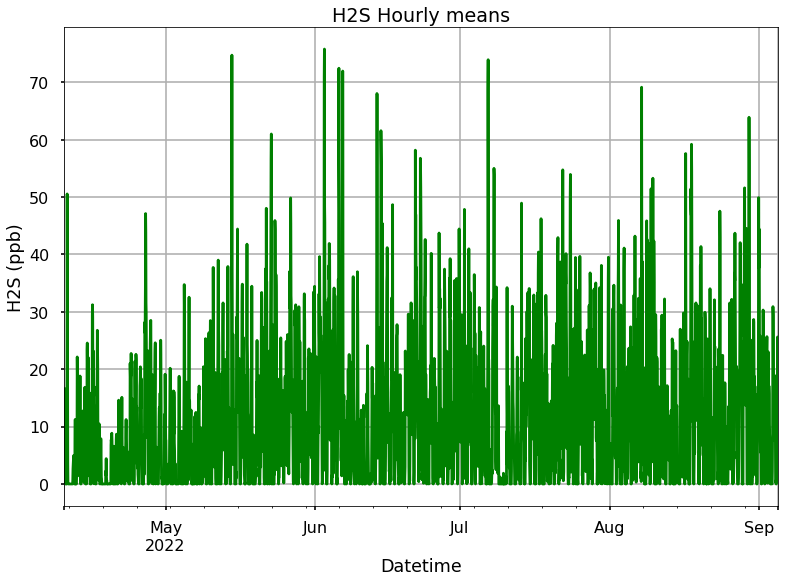

In [4]:
h2s.plot(grid=True,ylabel= 'H2S (ppb)',title = 'H2S Hourly means',c='g')
plt.show()

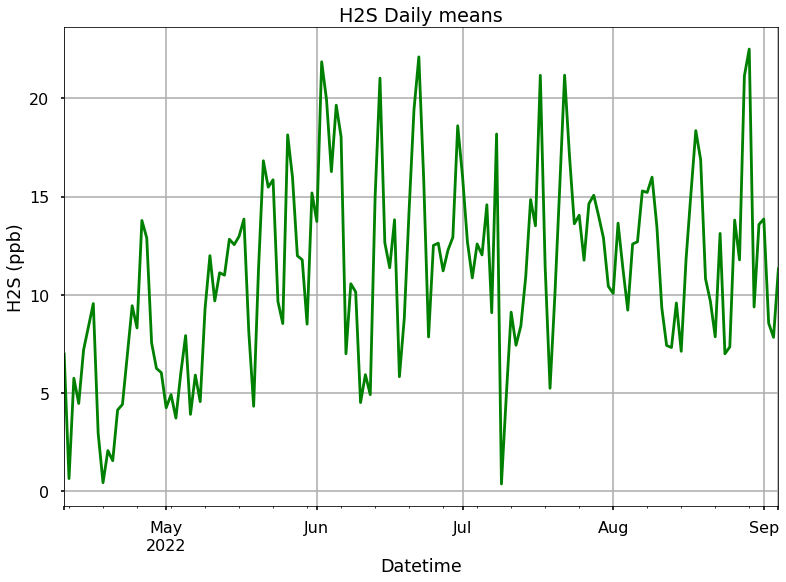

In [5]:
h2s_daily = h2s.resample('D').mean()
h2s_daily.plot(ylabel= 'H2S (ppb)', grid=True, c='g')
plt.title('H2S Daily means')
plt.show()

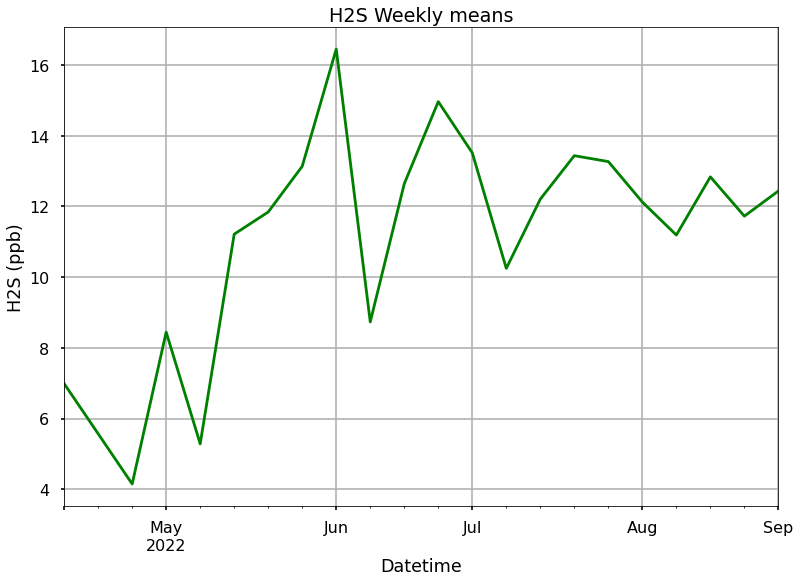

In [6]:
weekly_h2s = h2s.resample('W').mean()
weekly_h2s.plot(ylabel= 'H2S (ppb)', grid=True, title = 'H2S Weekly means', c='g')
plt.show()

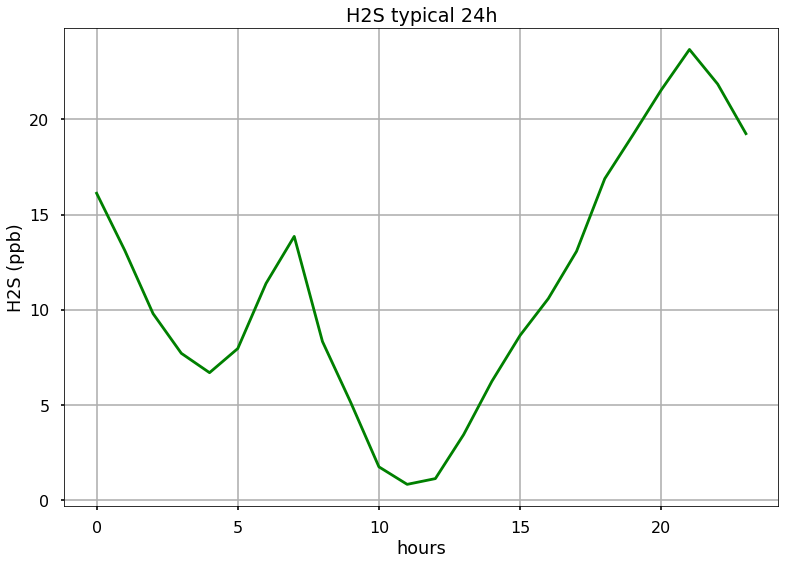

In [7]:
h2s_24 = h2s.groupby(kunak.index.hour).mean()
h2s_24.plot(grid=True, ylabel = 'H2S (ppb)', xlabel = 'hours', c='g')
plt.title('H2S typical 24h')
plt.show()

In [8]:
buckets = [0, 20, h2s.max()]

In [9]:
h2s_binned = pd.cut(h2s, buckets, include_lowest=True)

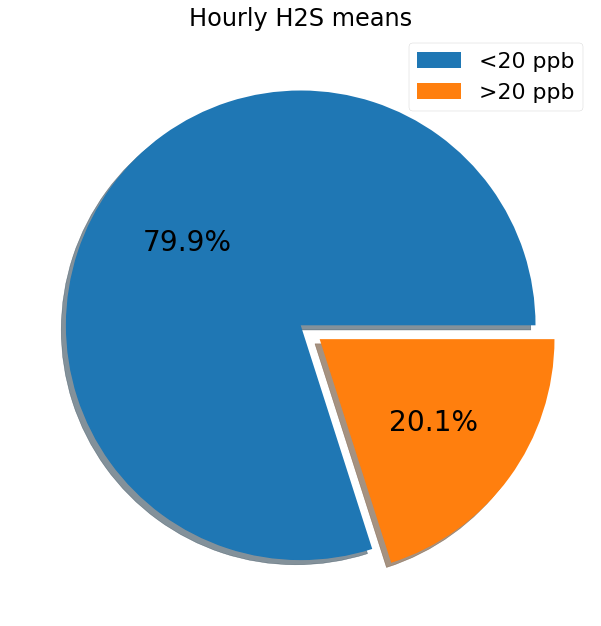

In [39]:
h2s_binned.value_counts().plot(kind="pie", explode=[0,0.1], autopct='%1.1f%%', shadow=True,  legend=True, labeldistance=None, ylabel='', fontsize=28)
plt.title('Hourly H2S means', fontsize=24)
plt.legend(['<20 ppb','>20 ppb'], fontsize=22)
plt.tight_layout()
plt.savefig('Plots/h2s/pie.png')
plt.show()

In [11]:
df = pd.read_csv('kunak_wind.csv')

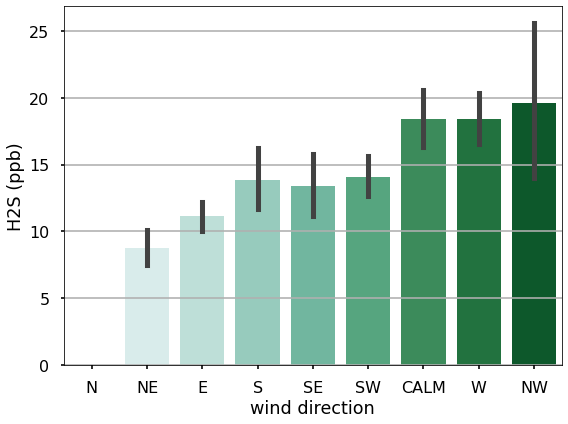

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x='wind direction',y= 'H2S (ppb)', data=df, order=["N","NE","E","S","SE","SW","CALM","W","NW"], palette="BuGn")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('Plots/h2s/wind.png')
plt.show()

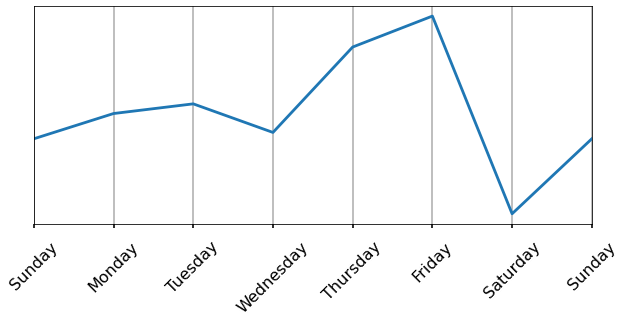

In [28]:
kunak_daily = kunak.resample('D').mean()
x = seasonal_decompose(kunak_daily['H2S (ppb)'], period=7).seasonal[:8]
x.plot(figsize=(10,4))
plt.xlabel('')
plt.yticks([])
plt.grid(axis='x')
plt.xticks(x.index, x.index.day_name(), rotation=45)
plt.show()

In [14]:
wind_24 = wind['wind direction'].groupby(wind.index.hour).agg(pd.Series.mode)
wind_24

0     SW
1     SW
2      W
3     SW
4     SW
5     SW
6     SW
7     SW
8      E
9      E
10     E
11     E
12    NE
13     E
14     E
15     E
16    NE
17     E
18     E
19     E
20     E
21     W
22     W
23     W
Name: wind direction, dtype: object

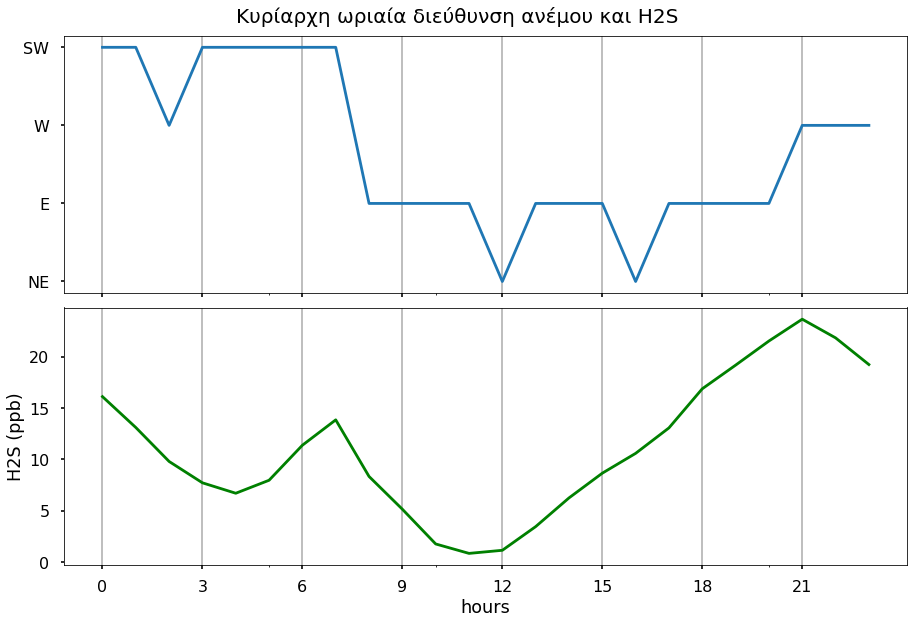

In [36]:
fig, ax = plt.subplots(2,sharex=True)

ax[0].plot(wind_24.index, wind_24.values)
ax[0].invert_yaxis()
ax[0].grid(axis='x')

h2s_24.plot(ylabel = 'H2S (ppb)', xlabel = 'hours', c='g', ax=ax[1])
ax[1].grid(axis='x')

plt.xticks(np.arange(0,24,3))
plt.suptitle('Κυρίαρχη ωριαία διεύθυνση ανέμου και H2S', fontsize=20)
plt.tight_layout()
plt.savefig('Plots/h2s/prominent_direction.png')
plt.show()